# Linear Regression with Animated Gradient Descent
This notebook demonstrates linear regression using gradient descent, visualized step-by-step through animation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import animation

# Step 1: Create a synthetic dataset
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


In [4]:
# Step 2: Linear regression using gradient descent (simulate rotation and translation)
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta = np.random.randn(2, 1)  # random initial values

learning_rate = 0.1
n_iterations = 100
theta_history = [theta.copy()]
absolute_errors = []  # To store absolute errors


for iteration in range(n_iterations):
    predictions = X_b.dot(theta)
    absolute_error = np.mean(np.abs(predictions - y))  # Calculate absolute error
    absolute_errors.append(absolute_error)
    
    gradients = 2 / 100 * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients
    theta_history.append(theta.copy())


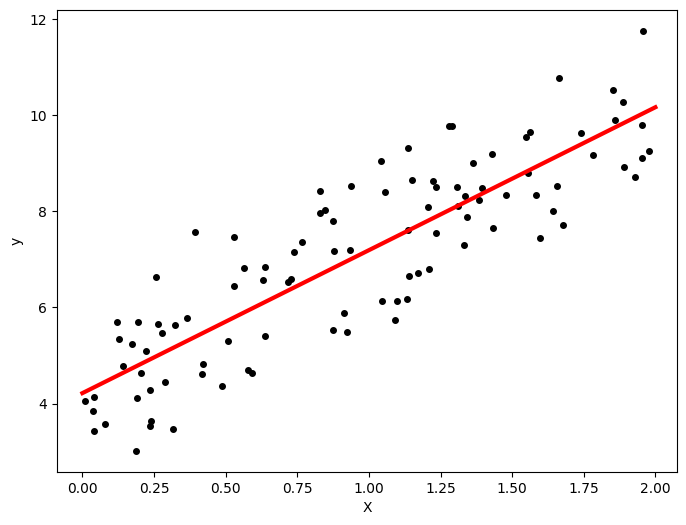

In [5]:
# Step 3: Set up the plot and animation
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(X, y, "k.", markersize=8)  # plot data points
ax.set_xlabel("X")
ax.set_ylabel("y")
line, = ax.plot([], [], "b-", linewidth=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    theta = theta_history[i]
    x_vals = np.array([[0], [2]])
    y_vals = theta[0] + theta[1] * x_vals
    line.set_data(x_vals, y_vals)
    line.set_color("blue")
    if i == n_iterations:
        line.set_color("red")
        line.set_linewidth(3)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=n_iterations+1, interval=500, blit=True)
HTML(anim.to_jshtml())


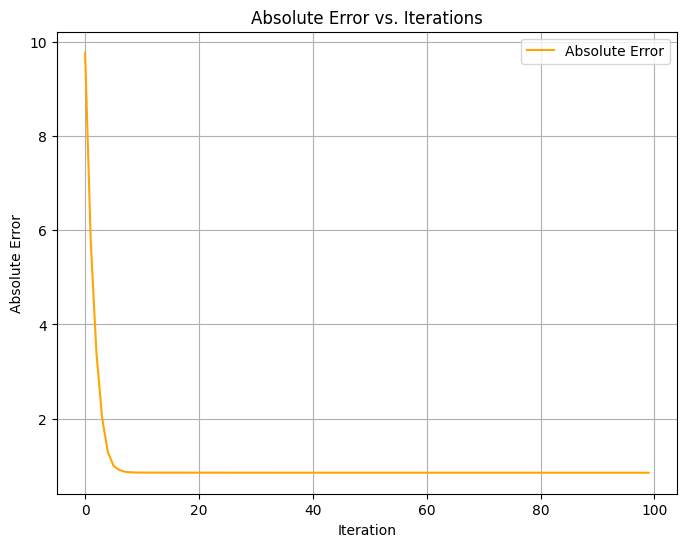

In [6]:
# Step 3: Plot the absolute error over iterations
plt.figure(figsize=(8, 6))
plt.plot(range(n_iterations), absolute_errors, label="Absolute Error", color="orange")
plt.xlabel("Iteration")
plt.ylabel("Absolute Error")
plt.title("Absolute Error vs. Iterations")
plt.legend()
plt.grid(True)
plt.show()